# Learning Material 

 MIT's [Deep Learning](http://www.deeplearningbook.org/) textbook for more information on these topics!

In [162]:
import tensorflow as tf

In [163]:
from tensorflow.contrib.learn.python.learn.datasets import mnist

In [164]:
from tensorflow.python.util.deprecation import deprecated

In [165]:
from tensorflow.contrib.learn.python.learn.datasets import mnist
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [166]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [167]:
mnist.train.images.shape

(55000, 784)

In [168]:
mnist.train.images[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [209]:
sample = mnist.train.images[2].reshape(28,28)

In [170]:
import matplotlib.pyplot as plt

In [171]:
%matplotlib inline

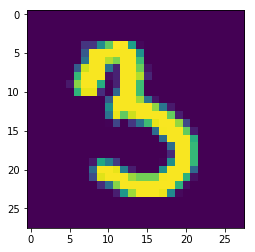

In [210]:
plt.imshow(sample)

In [247]:
sam2 = mnist.train.images[5500].reshape(28,28)

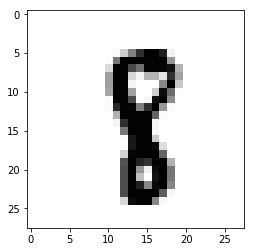

In [250]:
plt.imshow(sam2,cmap='Greys')

In [175]:
# Learning Rate is how quickly we adjust the cost rate
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [176]:
n_classes = 10
n_samples = mnist.train.num_examples

In [177]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256

In [178]:
def multilayer_perceptron(x,weights,biases):
    
    # First hidden layer 
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    # Now the RELU activation function
    layer_1= tf.nn.relu(layer_1)
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    
    # Now the RELU activation function 
    layer_2 = tf.nn.relu(layer_2)
    
    # now the output layer 
    out_layer = tf.add(tf.matmul(layer_2,weights['out']),biases['out'])
    
    return out_layer
    

In [179]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [217]:
values = tf.random_normal([n_input,n_hidden_1])

In [237]:
sess.run(values[0,1])

0.92403674

In [238]:
values1 = tf.random_normal([n_hidden_1,n_hidden_2])

In [246]:
sess.run(values1[255,255])

-0.055368096

In [180]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [181]:
x = tf.placeholder('float',[None,n_input])

In [182]:
y = tf.placeholder('float',[None,n_classes])

In [183]:
pred = multilayer_perceptron(x,weights,biases)

In [184]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [185]:
# Information about the Atom optimizer

[Adam Optimizer](http://arxiv.org/pdf/1412.6980v8.pdf)

In [186]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [251]:
init = tf.global_variables_initializer()

In [188]:
### Training the model

In [189]:
t = mnist.train.next_batch(100)

In [138]:
len(t[1])

1

In [139]:
xsamp,ysamp = t

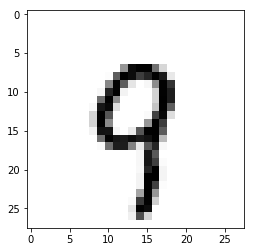

In [140]:
plt.imshow(xsamp.reshape(28,28))

In [141]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# Run The session

In [190]:
sess =  tf.InteractiveSession()

In [191]:
init = tf.global_variables_initializer()

In [192]:
sess.run(init)

In [200]:
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost=avg_cost+(c/total_batch)
    print ("Epoch: {} , cost = {:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 , cost = 162.1530
Epoch: 2 , cost = 38.4554
Epoch: 3 , cost = 24.3321
Epoch: 4 , cost = 17.1453
Epoch: 5 , cost = 12.4830
Epoch: 6 , cost = 9.3035
Epoch: 7 , cost = 7.0088
Epoch: 8 , cost = 5.2362
Epoch: 9 , cost = 4.0083
Epoch: 10 , cost = 2.8992
Epoch: 11 , cost = 2.1284
Epoch: 12 , cost = 1.6753
Epoch: 13 , cost = 1.2872
Epoch: 14 , cost = 1.0046
Epoch: 15 , cost = 0.7999
Model has completed 15 Epochs of Training


In [201]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [202]:
correct_predictions.shape

TensorShape([Dimension(None)])

In [203]:
print (correct_predictions[1])

Tensor("strided_slice_4:0", shape=(), dtype=bool)


In [204]:
correct_predictions = tf.cast(correct_predictions, "float")

In [205]:
accuracy = tf.reduce_mean(correct_predictions)

In [206]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9437


In [132]:
x = tf.constant([[1., 9.], [8., 2.]])

In [133]:
print(sess.run(tf.reduce_mean(x))) # 1.5
#tf.reduce_mean(x, 0)  # [1.5, 1.5]
#tf.reduce_mean(x, 1)  # [1.,  2.]

5.0


In [134]:
print (sess.run(tf.reduce_mean(x, 0)))

[4.5 5.5]


In [135]:
print (sess.run(tf.reduce_mean(x, 1)))

[5. 5.]


In [ ]:
# Image identification of Numbers in python using TensorFlow and Neural Networks
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets import mnist
from tensorflow.python.util.deprecation import deprecated
from tensorflow.contrib.learn.python.learn.datasets import mnist
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

type(mnist)
mnist.train.images.shape
mnist.train.images[2]
sample = mnist.train.images[2].reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sample)
sam2 = mnist.train.images[5500].reshape(28,28)
plt.imshow(sam2,cmap='Greys')

# Learning Rate is how quickly we adjust the cost rate
learning_rate = 0.001
training_epochs = 15
batch_size = 100

n_classes = 10
n_samples = mnist.train.num_examples

n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256

def multilayer_perceptron(x,weights,biases):
    
    # First hidden layer 
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    # Now the RELU activation function
    layer_1= tf.nn.relu(layer_1)
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    
    # Now the RELU activation function 
    layer_2 = tf.nn.relu(layer_2)
    
    # now the output layer 
    out_layer = tf.add(tf.matmul(layer_2,weights['out']),biases['out'])
    
    return out_layer
    

weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}


biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])
pred = multilayer_perceptron(x,weights,biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

# Information about the Atom optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
init = tf.global_variables_initializer()

### Training the model
t = mnist.train.next_batch(100)
len(t[1])
xsamp,ysamp = t
plt.imshow(xsamp.reshape(28,28))
ysamp
# Run The session
sess =  tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost=avg_cost+(c/total_batch)
    print ("Epoch: {} , cost = {:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of Training".format(training_epochs))

correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
correct_predictions.shape
print (correct_predictions[1])
correct_predictions = tf.cast(correct_predictions, "float")
accuracy = tf.reduce_mean(correct_predictions)
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))